# Iris Flower DataSet - Support Vector Machines


## DataSet

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 

Example of discriminant analysis. 

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

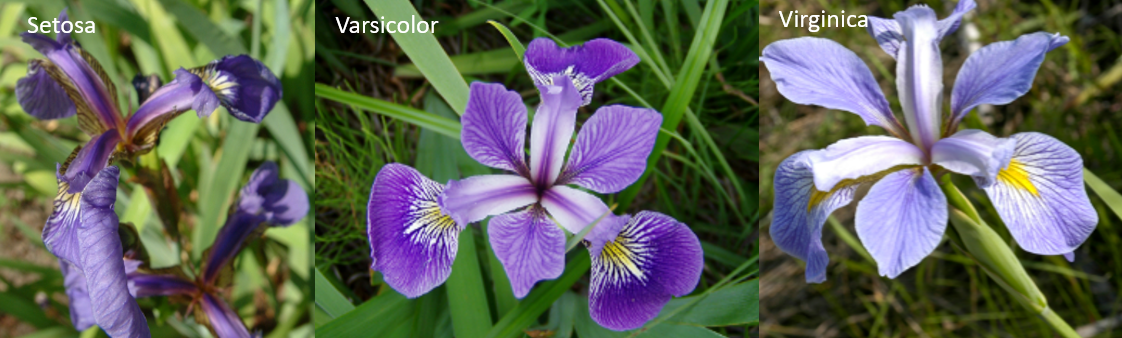

In [39]:
from IPython.display import Image
Image(filename="./data/iris.png")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

## Exploratory Data Analysis

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Lets create a pairplot of the data set to identify which flower species seems to be the most separable**

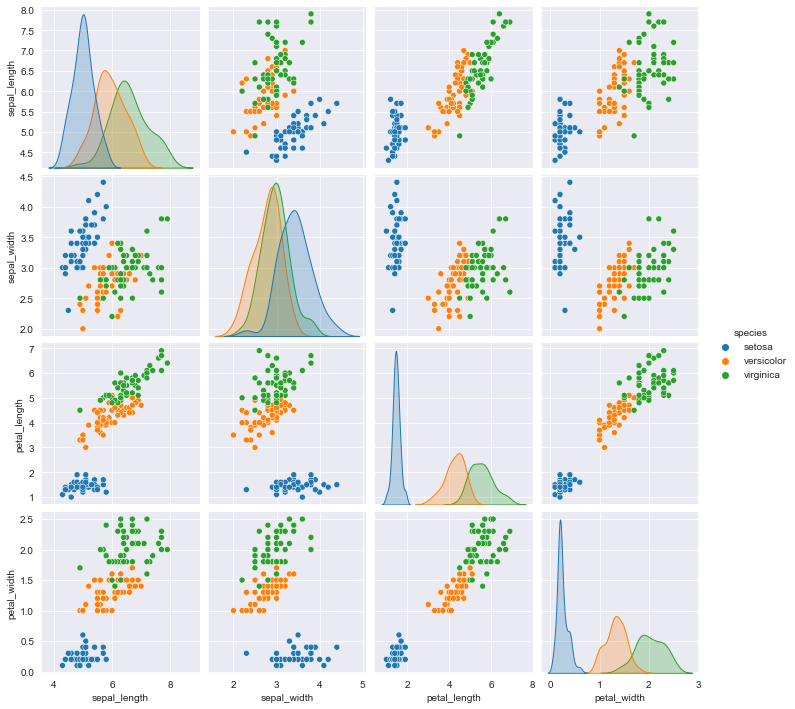

In [7]:
sns.set_style('darkgrid')
sns.pairplot(iris, hue = 'species', diag_kind='kde')

The **setosa** seems to be the most separable

Lets create a kde plot of **sepal_length** versus **sepal_width** for **setosa** species of flower to get an idea of the distribution of setosa dimensions

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

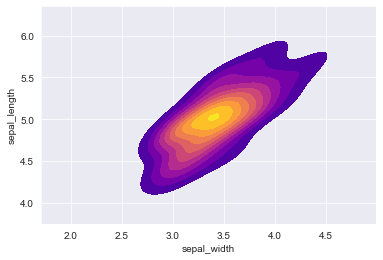

In [36]:
data1 = iris[iris['species'] == 'setosa']['sepal_length']
data2 = iris[iris['species'] == 'setosa']['sepal_width']
sns.kdeplot(data2, data1, cmap = 'plasma', shade  = True, shade_lowest= False)

Sepal lenght of 5 cm and width of 3.4 cm seems to be the common dimensions. The below calculation confirms this observation

In [14]:
print(iris[iris['species'] == 'setosa']['sepal_length'].mean())
print(iris[iris['species'] == 'setosa']['sepal_width'].mean())

5.005999999999999
3.428000000000001


## Train Test Split

**Step1: Split the data into a training set and testing set with a test set size of 30%**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = iris.drop('species', axis = 1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train the Model

**Step 2: Call the SVC() model from sklearn and fit the model to the training data.**

In [6]:
from sklearn.svm import SVC

In [7]:
model = SVC()

In [8]:
model.fit(X_train, y_train)

SVC()

## Model Evaluation

**Step 3: Get model predictions**

In [9]:
pred = model.predict(X_test)

**Step4: create a confusion matrix and a classification report.**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## SVR Optimization (Gridsearch)

In [25]:
from sklearn.model_selection import GridSearchCV

**Step 1: Create a dictionary called param_grid and fill out parameters for C and gamma.**

In [27]:
param_grid = {'C':[0.1, 1,10,100,1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

**Step 2: Create a GridSearchCV object and fit it to the training data**

In [32]:
grid = GridSearchCV(SVC(), param_grid, verbose=2)

**Step 3: Fit the GridSearchCV Object to the training data**

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [34]:
#Identify the best parameters for this model
grid.best_params_

{'C': 1, 'gamma': 0.1}

**Step 4: Get new model predictions**

In [36]:
grid_pred = grid.predict(X_test)

**Step5: create a confusion matrix and a classification report.**

In [37]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



We got exactly the the same result, this makes sense, there is one point that is too noisey to grab. We don't want to have an overfit model that would be able to grab that.